In [19]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Loading the Data

To look for connections between GDP and life expectancy load the datasets into DataFrames so that they can be visualized.

Here **all_data.csv** will be read in into a DataFrame called `df`, followed by a quick inspection of the DataFrame using `.head()` to check its contents.

In [20]:
df = pd.read_csv(r"C:\Data Analytics\Data\Data Portfolio\Life-Expectancy-and-GDP-Starter\Life-Expectancy-and-GDP-Code-Solution\all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [21]:
df.shape

(96, 4)

## Explore the Data

First, more needs to be explored about the countries that are represented in `df`. There seems to be six countries, Chile, China, Germany, Mexico, the US, and Zimbabwe represented in the data.

In [22]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [23]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


#### Cleaning Column Name

Looking over the data, there are inconsistencies with the column names. For example, the first two column names are one word each, while the third is five words long! `Life expectancy at birth (years)` is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself. The `rename` function is used to change the column name to `LEABY`.

In [24]:
df = df.rename({'Life expectancy at birth (years)':'LEABY'}, axis='columns')
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


#### Exploratory Plots

Below the distribution of `GDP` is being shown. The distribution of `GDP` in the data is very right skewed where most of the values are on the left-hand side.

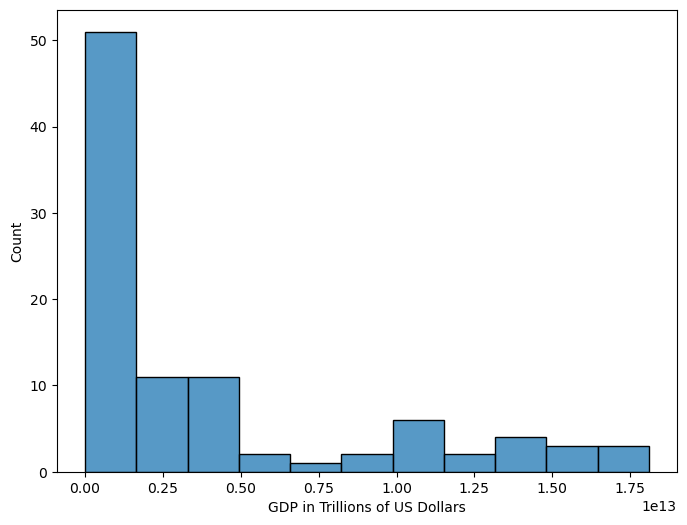

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='GDP')
plt.xlabel('GDP in Trillions of US Dollars')
plt.show()

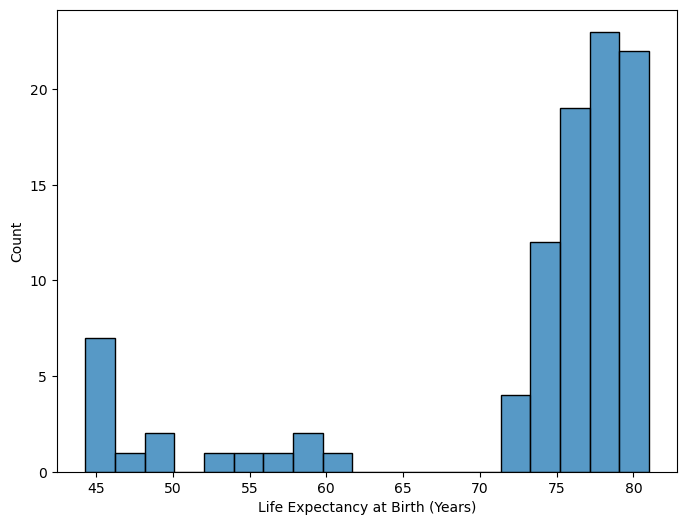

In [26]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='LEABY')
plt.xlabel('Life Expectancy at Birth (Years)')
plt.show()

The previous plots did not break up the data by countries, so the next task will be to find the average `LEABY` and `GDP` by country.

In [27]:
dfMeans = df.drop('Year', axis = 1).groupby('Country').mean().reset_index()
dfMeans

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Now that they are broken down by `Country` and the average values for `LEEABY` and `GDP` are created, bar plots showing the mean values for each variable are created below. 

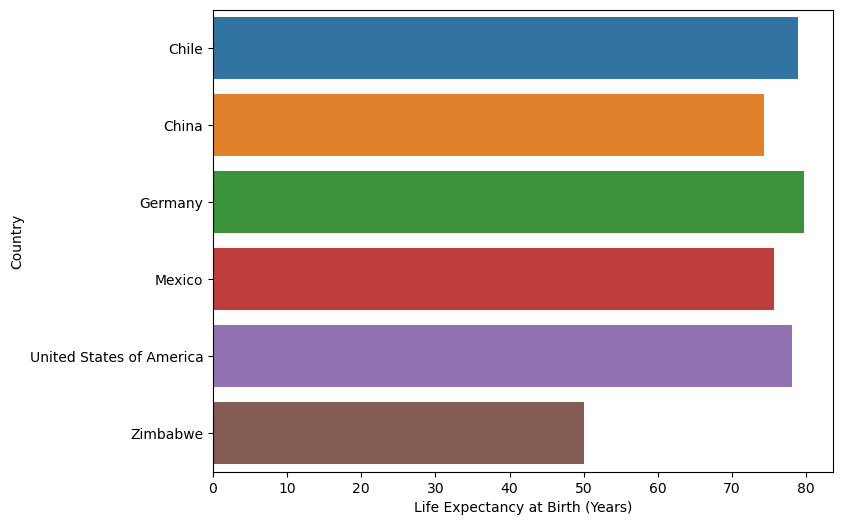

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(data=dfMeans, x='LEABY', y='Country')
plt.xlabel('Life Expectancy at Birth (Years)')
plt.show()

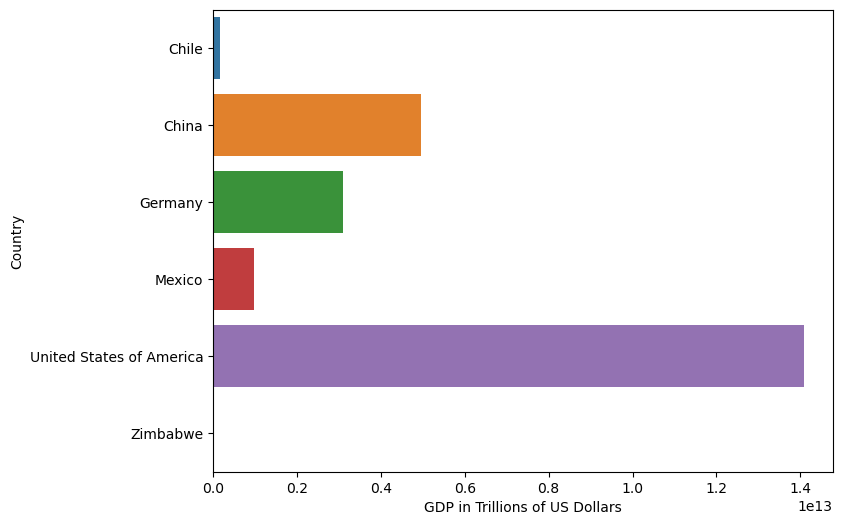

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(data=dfMeans, x='GDP', y='Country')
plt.xlabel('GDP in Trillions of US Dollars')
plt.show()

#### Violin Plots

Another way to compare data is to visualize the distributions of each and to look for patterns in the shapes.

The violin plot is a popular choice because it can show the shape of the distribution compared to the box plot. Below, country is on the x-axis and the distribution of numeric columns : `GDP` and `LEABY` are on the y axis. 

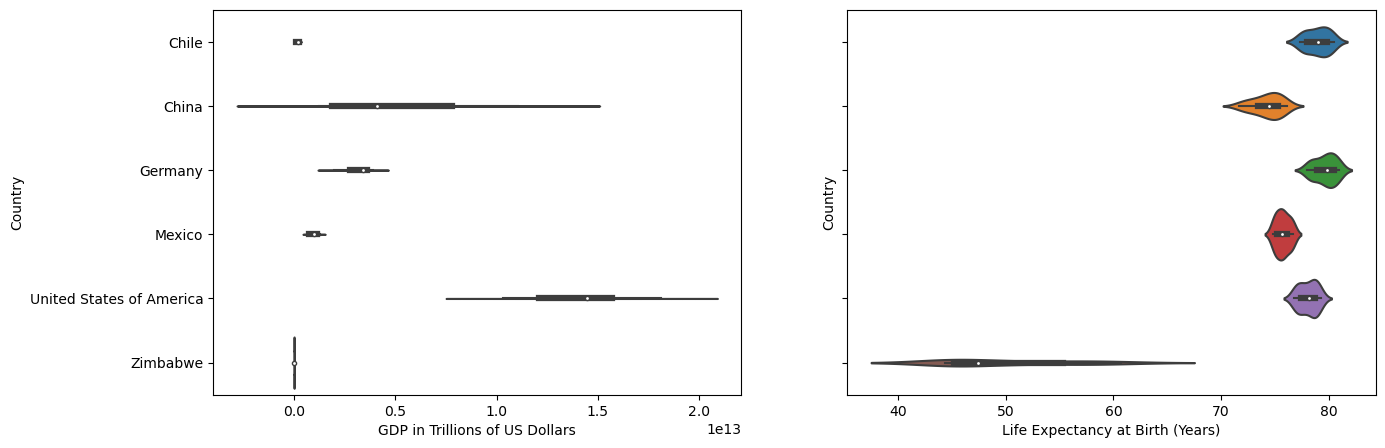

In [30]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel('GDP in Trillions of US Dollars')
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel('Life Expectancy at Birth (Years)')
plt.show()

#### Swarm Plots

Another newer method for showing distributions is the swarm plot, and they can be used to complement the box and violin plots. First the stand alone swarm plot is shown and then overlayed on top of a violin plot.

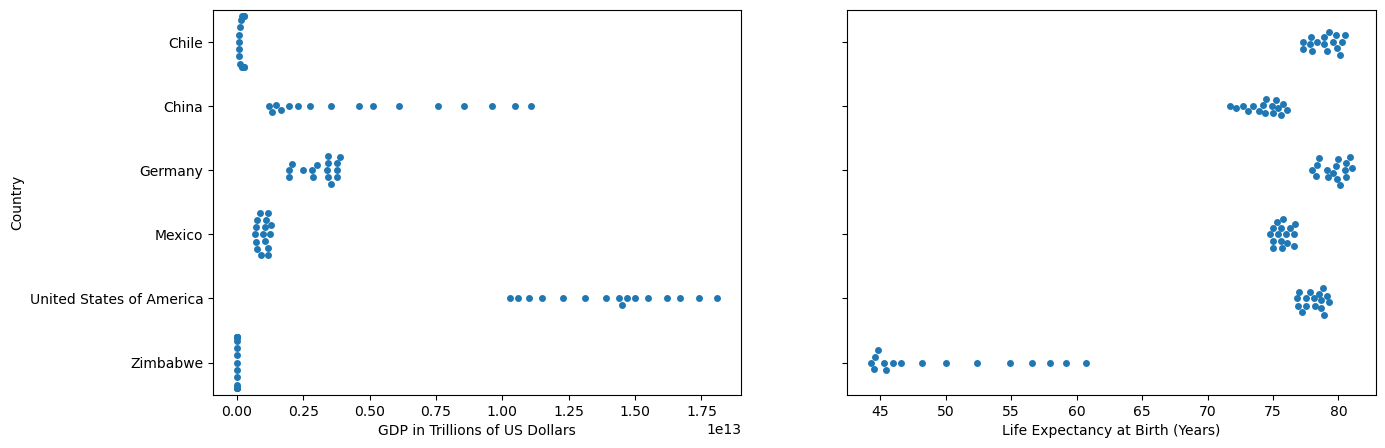

In [31]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))
axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel('GDP in Trillions of US Dollars')
axes[1] = sns.swarmplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel('Life Expectancy at Birth (Years)')
plt.show()

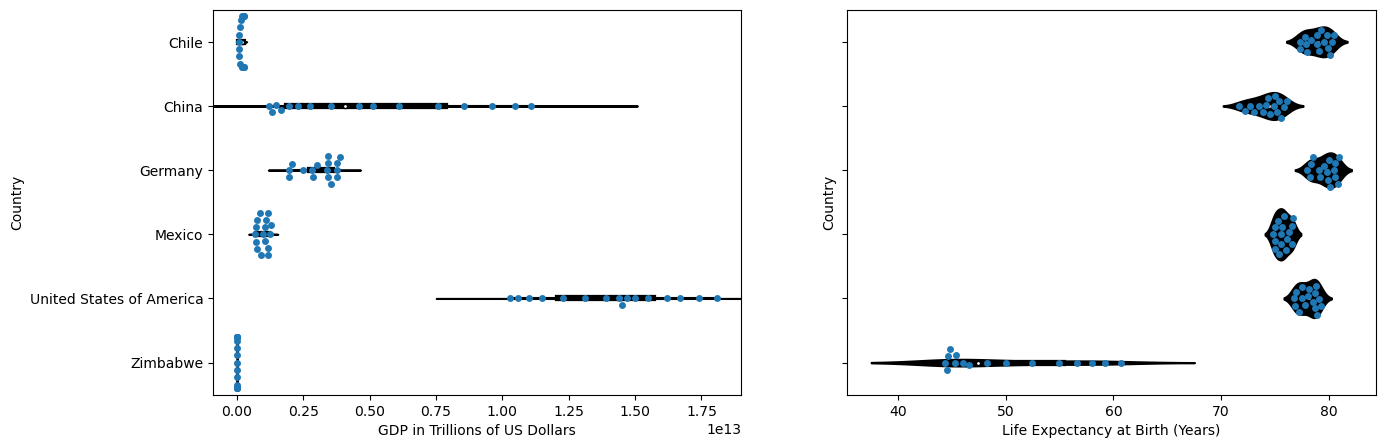

In [32]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country, color='black')
axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel('GDP in Trillions of US Dollars')
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country, color='black')
axes[1] = sns.swarmplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel('Life Expectancy at Birth (Years)')
plt.show()

#### Line Charts

Next the data will explore `GDP` and `LEABY` over the years through line charts. Below the countries are separated by colors and one can see that the US and China have seen substantial gains between 2000-2015.

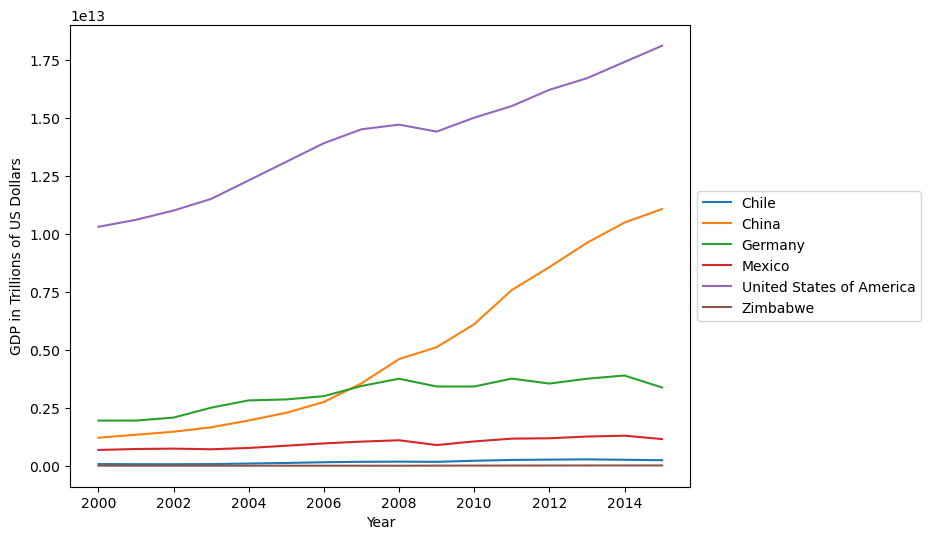

In [33]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('GDP in Trillions of US Dollars')
plt.show()

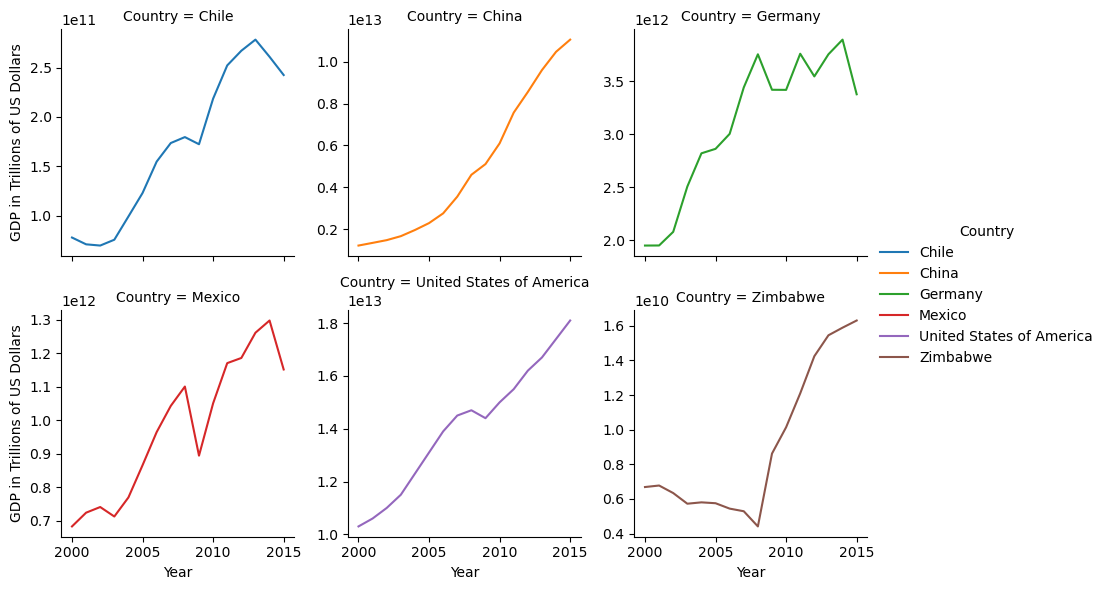

In [34]:
graphGDP = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey=False)
graphGDP = (graphGDP.map(sns.lineplot, 'Year', 'GDP').add_legend().set_axis_labels('Year', 'GDP in Trillions of US Dollars'))
graphGDP

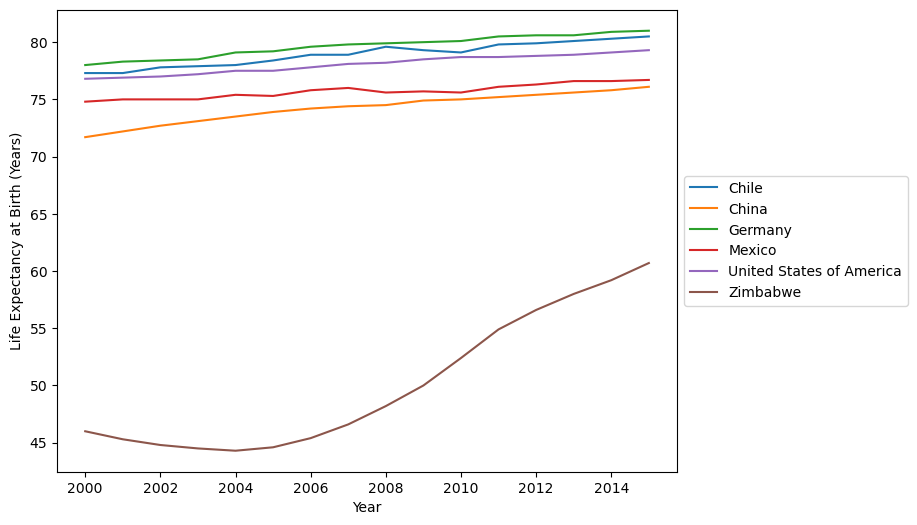

In [35]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('Life Expectancy at Birth (Years)')
plt.show()

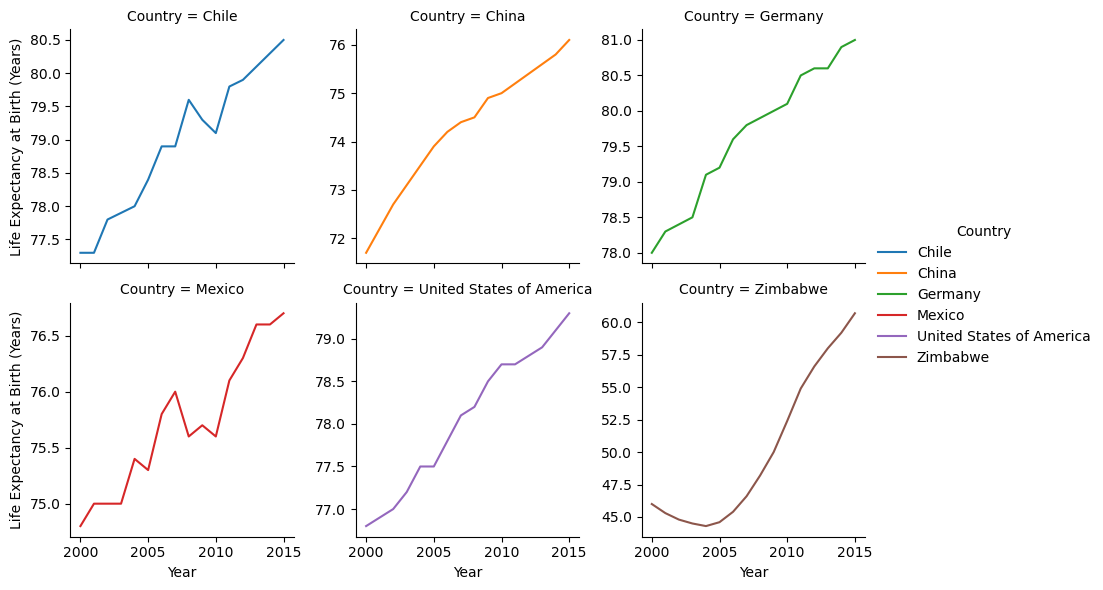

In [36]:
graphLEABY = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey=False)
graphLEABY = (graphLEABY.map(sns.lineplot, 'Year', 'LEABY').add_legend().set_axis_labels('Year', 'Life Expectancy at Birth (Years)'))
graphLEABY